Лабораторная работа №3 “Переобучение и регуляризация”
======

Лабораточная работа выполнена на языке **Python** c помощью интерактивной оболочки **Jupyter Notebook**
Исходный код работы - lab3.py.
Файл jupyter notebook - lab3.ipynb

Набор данных ex3data1.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит две переменные X (изменения уровня воды) и y (объем воды, вытекающий из дамбы). По переменной X необходимо предсказать y. Данные разделены на три выборки: обучающая выборка (X, y), по которой определяются параметры модели; валидационная выборка (Xval, yval), на которой настраивается коэффициент регуляризации; контрольная выборка (Xtest, ytest), на которой оценивается качество построенной модели.

## Ход работы

### Загрузите данные ex3data1.mat из файла.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io

In [4]:
data = scipy.io.loadmat('ex3data1.mat')
x = np.array(data['X'])
y = np.squeeze(data['y'])
X = np.insert(x, 0, 1, axis=1)

### Постройте график, где по осям откладываются X и y из обучающей выборки.

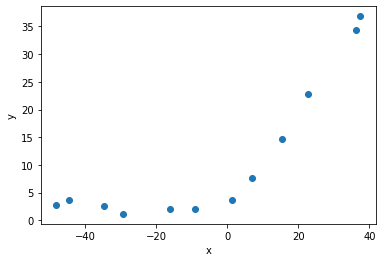

In [3]:
plt.figure()
plt.scatter(x.flatten(), y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Реализуйте функцию стоимости потерь для линейной регрессии с L2-регуляризацией.

In [13]:
def compute_cost_reg(X, y, theta, l = 1):
    m = y.shape[0]
    h = X.dot(theta)
    loss = h - y
    cost = np.sum(loss ** 2) / (2 * m) + (l / (2*m)) * np.sum(np.square(theta))
    return cost, loss

In [14]:
initial_theta = np.zeros(X.shape[1])
compute_cost_reg(X, y, initial_theta)

(140.95412088055392,
 array([ -2.13431051,  -1.17325668, -34.35910918, -36.83795516,
         -2.80896507,  -2.12107248, -14.71026831,  -2.61418439,
         -3.74017167,  -3.73169131,  -7.62765885, -22.7524283 ]))

### Реализуйте функцию градиентного спуска для линейной регрессии с L2-регуляризацией.

In [15]:
def gradient_descent_reg(X, y, theta, l, alpha, num_iters):
    m = y.shape[0]  # Size of training set
    j_history = []
    XT = X.T
    for i in range(0, num_iters):
        cost, loss = compute_cost_reg(X, y, theta, l)
        gradient = (XT.dot(loss) + l * theta) / m
        theta -= alpha * gradient
        j_history.append(cost)

    return theta, j_history

In [16]:
initial_theta = np.zeros(X.shape[1])
theta, costs = gradient_descent_reg(X, y, initial_theta, l=1, alpha=0.0022, num_iters=1000)
print(f'GradDesc cost = {costs[-1]} and theta:\n{theta}')

GradDesc cost = 29.695375543493455 and theta:
[10.86601315  0.35442522]


### Постройте модель линейной регрессии с коэффициентом регуляризации 0 и постройте график полученной функции совместно с графиком из пункта 2. Почему регуляризация в данном случае не сработает?

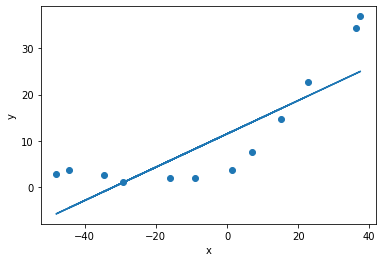

In [18]:
initial_theta = np.zeros(X.shape[1])
theta, _ = gradient_descent_reg(X, y, initial_theta, l=0, alpha=0.0022, num_iters=1000)
h = X.dot(theta)
plt.figure()
plt.scatter(x.flatten(), y, label='Dataset')
plt.plot(x.flatten(), h, label='H')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Регуляризация не работает потому что, при коэффициенте l = 0, никаких изменений в изначальные функции стоимости потерь и градиентном спуске никаких изменений не вносится, это следует из вычислений, дополнительные параметры регуляризации обращаются в ноль.

### Постройте график процесса обучения (learning curves) для обучающей и валидационной выборки. По оси абсцисс откладывается число элементов из обучающей выборки, а по оси ординат - ошибка (значение функции потерь) для обучающей выборки (первая кривая) и валидационной выборки (вторая кривая). Какой вывод можно сделать по построенному графику?

In [19]:
def train(x_train, x_val, y_train, y_val):
    X = np.insert(x_train, 0, 1, axis=1)
    initial_theta = np.zeros(X.shape[1])
    theta, train_costs = gradient_descent_reg(X, y_train, initial_theta, l=0, alpha=0.0005, num_iters=1000)
    X_val = np.insert(x_val, 0, 1, axis=1)
    val_cost = compute_cost_reg(X_val, y_val, theta, l=0)
    return train_costs[-1], val_cost[0]


def plot_learning_curves(x_train, x_val, y_train, y_val):
    m, n = x_train.shape
    train_costs = []
    val_costs = []
    for size in range(4 , m):
        inds = range(0, size)
        t, v = train(x_train[inds, :], x_val[inds, :], y_train[inds], y_val[inds])
        train_costs.append(t)
        val_costs.append(v)

    plt.figure()
    plt.plot(train_costs, 'b')
    plt.plot(val_costs, 'r')
    plt.show()

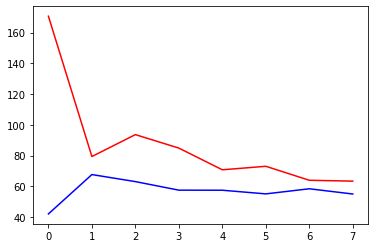

In [20]:
x_val = data['Xval']
y_val = np.squeeze(data['yval'])
plot_learning_curves(x, x_val, y, y_val)

Вывод: как видно по графику, с ростом размера выборки графики потерь на тренировочном наборе и валидационном приближаются друг к другу, т.е. чем больше размер тренировочной выборки тем точнее результат обучения.

### Реализуйте функцию добавления p - 1 новых признаков в обучающую выборку (X2, X3, X4, …, Xp).

In [22]:
def map_feature(x, p):
    out = x
    
    for i in range(2, p + 1):
        r = x ** i
        out = np.append(out, r, axis=1)

    return out

### Поскольку в данной задаче будет использован полином высокой степени, то необходимо перед обучением произвести нормализацию признаков.

In [23]:
def feature_normalization(X):
    norm = (X - X.mean(axis=0)) / X.std(axis=0)
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    return norm, mu, sigma

### Обучите модель с коэффициентом регуляризации 0 и p = 8.

In [24]:
X = map_feature(x, 8)
X_norm, mu, sigma = feature_normalization(X)
X_norm = np.insert(X_norm, 0, 1, axis=1)

In [103]:
initial_theta = np.zeros(X_norm.shape[1])
theta, costs = gradient_descent_reg(X_norm, y, initial_theta, l=0, alpha=0.3, num_iters=1000)

### Постройте график модели, совмещенный с обучающей выборкой, а также график процесса обучения. Какой вывод можно сделать в данном случае?

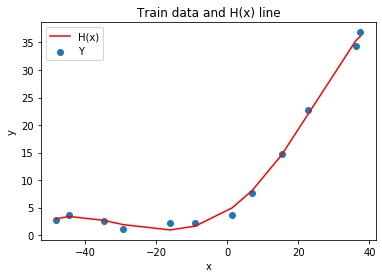

In [84]:
h = X_norm.dot(theta)
new_x, new_h = zip(*sorted(zip(x.flatten(), h)))
plt.figure()
plt.scatter(x.flatten(), y)
plt.plot(new_x, new_h, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train data and H(x) line')
plt.legend(['H(x)', 'Y'])
plt.show()

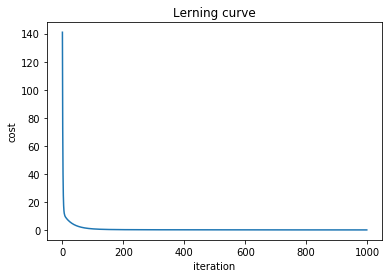

In [85]:
plt.figure()
plt.plot(costs)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('Lerning curve')
plt.show()

Вывод: с увеличенным количеством входных признаков мы получили полиномиальную функцию максимально приближенную в исходным данным, по графику обучения видно что функция градиентного спуска сходится довольно быстро.

### Постройте графики из пункта 10 для моделей с коэффициентами регуляризации 1 и 100. Какие выводы можно сделать?

In [96]:
initial_theta = np.zeros(X_norm.shape[1])
theta1, costs1 = gradient_descent_reg(X_norm, y, initial_theta, l=1, alpha=0.1, num_iters=400)

In [97]:
initial_theta = np.zeros(X_norm.shape[1])
theta2, costs2 = gradient_descent_reg(X_norm, y, initial_theta, l=100, alpha=0.1, num_iters=400)

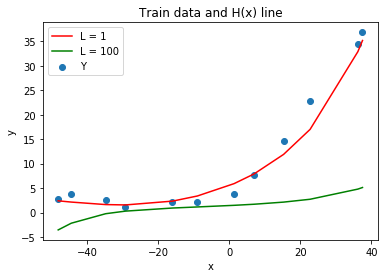

In [98]:
h1 = X_norm.dot(theta1)
new_x1, new_h1 = zip(*sorted(zip(x.flatten(), h1)))
h2 = X_norm.dot(theta2)
new_x2, new_h2 = zip(*sorted(zip(x.flatten(), h2)))
plt.figure()
plt.scatter(x.flatten(), y)
plt.plot(new_x1, new_h1, 'r-')
plt.plot(new_x2, new_h2, 'g-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train data and H(x) line')
plt.legend(['L = 1', 'L = 100', 'Y'])
plt.show()

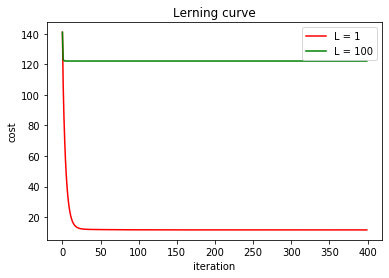

In [99]:
plt.figure()
plt.plot(costs1, 'r-')
plt.plot(costs2, 'g-')
plt.legend(['L = 1', 'L = 100'])
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('Lerning curve')
plt.show()

Вывод: Видно что небольшие значение лямбда при регуляризации помогают избежать переобучения, а очень большие значения лямбда приводят к недообучаемости модели.

### С помощью валидационной выборки подберите коэффиент регуляризации, который позволяет достичь наименьшей ошибки. Процесс подбора отразите с помощью графика (графиков).

In [100]:
def find_l(x_train, x_val, y_train, y_val):
    X_train = map_feature(x_train, 8)
    X_train, _, _ = feature_normalization(X_train)
    X_train = np.insert(X_train, 0, 1, axis=1)
    X_val = map_feature(x_val, 8)
    X_val, _, _ = feature_normalization(X_val)
    X_val = np.insert(X_val, 0, 1, axis=1)
    l_vals = np.linspace(0, 4, 50)
    l_costs = np.empty(shape=(0))
    for l in l_vals:
        initial_theta = np.zeros(X_train.shape[1])
        theta, costs = gradient_descent_reg(X_train, y_train, initial_theta, l=l, alpha=0.2, num_iters=1000)
        c = compute_cost_reg(X_val, y_val, theta, l=0)
        l_costs = np.append(l_costs, c[0])

    plt.figure()
    plt.plot(l_vals, l_costs)
    plt.xlabel('Lambda')
    plt.ylabel('Cost')
    plt.show()

    ind = l_costs.argmin()
    return l_vals[ind]

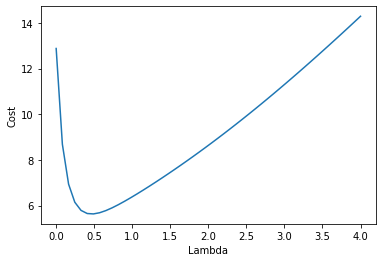

Best fitting lambda for validation set is 0.4897959183673469


In [101]:
lb = find_l(x, x_val, y, y_val)
print(f'Best fitting lambda for validation set is {lb}')

### Вычислите ошибку (потерю) на контрольной выборке.

In [105]:
x_test = np.array(data['Xtest'])
y_test = np.squeeze(data['ytest'])
X_test = map_feature(x_test, 8)
X_test, _, _ = feature_normalization(X_test)
X_test = np.insert(X_test, 0, 1, axis=1)
X_train = map_feature(x, 8)
X_train, _, _ = feature_normalization(X_train)
X_train = np.insert(X_train, 0, 1, axis=1)

In [108]:
initial_theta = np.zeros(X_train.shape[1])
theta, _ = gradient_descent_reg(X_train, y, initial_theta, l=lb, alpha=0.3, num_iters=1000)
test_cost = compute_cost_reg(X_test, y_test, theta, l=lb)
print(f'Cost on test set: {test_cost[0]}')

Cost on test set: 11.585832169340772


## Вывод
В данной лабораторной работе мы разобрались что такое переобучение и как можно влиять на процесс обучения с помощью регуляризации.